In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [62]:
kdd_df = pd.read_csv("kddcup_dataset.csv", index_col=None)

In [63]:
kdd_df

,duration,"""protocol_type""","""flag""","""src_bytes""","""dst_bytes""","""land""","""wrong_fragment""","""urgent""",hot,"""num_failed_logins""",...,"""dst_host_srv_count""","""dst_host_same_srv_rate""","""dst_host_diff_srv_rate""","""dst_host_same_src_port_rate""","""dst_host_srv_diff_host_rate""",dst_host_serror_rate,"""dst_host_srv_serror_rate""","""dst_host_rerror_rate""","""dst_host_srv_rerror_rate""",label
0,0,tcp,SF,223,185,0,0,0,0,0,...,255,1,0,1,1,0,0,0,0,normal
1,0,tcp,SF,230,260,0,0,0,0,0,...,255,1,0,33,7,33,0,0,0,normal
2,0,tcp,SF,297,13787,0,0,0,0,0,...,255,1,0,1,1,0,0,0,0,normal
3,0,tcp,SF,291,3542,0,0,0,0,0,...,255,1,0,1,1,0,0,0,0,normal
4,0,tcp,SF,295,753,0,0,0,0,0,...,255,1,0,1,1,0,0,0,0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41232,0,tcp,SF,277,525,0,0,0,0,0,...,255,1,0,1,6,0,0,0,0,normal
41233,0,tcp,SF,296,3616,0,0,0,0,0,...,214,1,0,1,4,0,0,0,0,normal
41234,0,tcp,SF,297,1158,0,0,0,0,0,...,223,1,0,1,4,0,0,0,0,normal
41235,0,tcp,SF,290,2126,0,0,0,0,0,...,255,1,0,33,7,0,0,0,0,normal


In [64]:
Counter(kdd_df['label']).most_common()  # share of different labels in dataset

[('normal', 39247),
 ('back', 1098),
 ('apache2', 794),
 ('neptune', 93),
 ('phf', 2),
 ('portsweep', 2),
 ('saint', 1)]

In [65]:
# create new labels with 0 - normal and 1 - all else abnormal
def label_anomalous(label):
    if(label=='normal'):
        return 0
    else:
        return 1
     
kdd_df['label'] = kdd_df['label'].apply(label_anomalous)

In [66]:
counts = Counter(kdd_df['label']).most_common()
counts

[(0, 39247), (1, 1990)]

In [67]:
y = kdd_df["label"].values
contamination_parameter = counts[1][1] / (counts[0][1] + counts[1][1])
contamination_parameter

0.04825763270848995

In [68]:
from sklearn.preprocessing import LabelEncoder

encoder_dict = {}
for c in kdd_df.columns:
    if(kdd_df[c].dtype=='object'):
        encoder_dict[c] = LabelEncoder()
        kdd_df[c] = encoder_dict[c].fit_transform(kdd_df[c])

In [69]:
kdd_df

,duration,"""protocol_type""","""flag""","""src_bytes""","""dst_bytes""","""land""","""wrong_fragment""","""urgent""",hot,"""num_failed_logins""",...,"""dst_host_srv_count""","""dst_host_same_srv_rate""","""dst_host_diff_srv_rate""","""dst_host_same_src_port_rate""","""dst_host_srv_diff_host_rate""",dst_host_serror_rate,"""dst_host_srv_serror_rate""","""dst_host_rerror_rate""","""dst_host_srv_rerror_rate""",label
0,0,0,7,223,185,0,0,0,0,0,...,255,1,0,1,1,0,0,0,0,0
1,0,0,7,230,260,0,0,0,0,0,...,255,1,0,33,7,33,0,0,0,0
2,0,0,7,297,13787,0,0,0,0,0,...,255,1,0,1,1,0,0,0,0,0
3,0,0,7,291,3542,0,0,0,0,0,...,255,1,0,1,1,0,0,0,0,0
4,0,0,7,295,753,0,0,0,0,0,...,255,1,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41232,0,0,7,277,525,0,0,0,0,0,...,255,1,0,1,6,0,0,0,0,0
41233,0,0,7,296,3616,0,0,0,0,0,...,214,1,0,1,4,0,0,0,0,0
41234,0,0,7,297,1158,0,0,0,0,0,...,223,1,0,1,4,0,0,0,0,0
41235,0,0,7,290,2126,0,0,0,0,0,...,255,1,0,33,7,0,0,0,0,0


## split dataset into abnormal and normal rows. Make train and test combining both

In [79]:
kdd_df_normal = kdd_df[kdd_df["label"] == 0]
kdd_df_abnormal = kdd_df[kdd_df["label"] == 1]

y_normal = kdd_df_normal.pop("label").values
X_normal = kdd_df_normal.values
y_anomaly = kdd_df_abnormal.pop("label").values
X_anomaly = kdd_df_abnormal.values

In [80]:
from sklearn.model_selection import train_test_split
X_normal_train, X_normal_test, y_normal_train,  y_normal_test = train_test_split(X_normal, y_normal, test_size=0.3, random_state=32)
X_abnormal_train, X_abnormal_test, y_abnormal_train, y_abnormal_test = train_test_split(X_anomaly, y_anomaly, test_size=0.3, random_state=32)

In [82]:
import numpy as np

X_train = np.concatenate((X_normal_train, X_abnormal_train))
y_train = np.concatenate((y_normal_train, y_abnormal_train))
X_test = np.concatenate((X_normal_test, X_abnormal_test))
y_test = np.concatenate((y_normal_test, y_abnormal_test))

In [83]:
X_train

array([[ 0,  0,  7, ...,  0,  0,  0],
       [ 0,  0,  7, ...,  0,  0,  0],
       [ 0,  0,  7, ...,  0,  0,  0],
       ...,
       [ 0,  0,  7, ...,  1,  6,  6],
       [ 0,  0,  7, ...,  0,  4,  4],
       [ 0,  0,  3, ..., 17, 56, 59]])

In [84]:
X_test.shape

(12372, 40)

In [85]:
from sklearn.ensemble import IsolationForest

In [86]:
# proportion of anomaly used in IsolationForest
IF = IsolationForest(contamination = contamination_parameter)

In [87]:
IF.fit(X_train)

IsolationForest(contamination=0.04825763270848995)

## Decision Boundaries for normal and abnormal portions

In [88]:
decision_scores_train_normal = IF.decision_function(X_normal_train)
print(decision_scores_train_normal, len(decision_scores_train_normal))
decision_scores_train_abnormal = IF.decision_function(X_abnormal_train)
print(decision_scores_train_abnormal, len(decision_scores_train_abnormal))

[0.22661633 0.22242822 0.22534112 ... 0.22815627 0.21632435 0.0350789 ] 27472
[-0.08172114 -0.00875448 -0.06288178 ... -0.03640103 -0.00574982
 -0.14163708] 1393


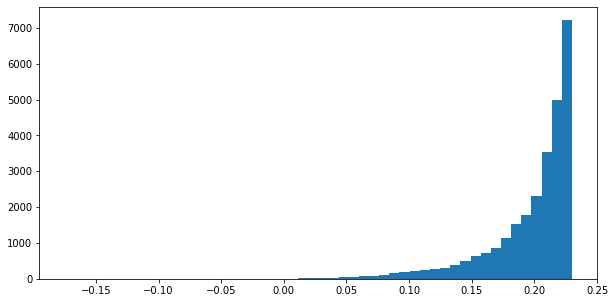

In [89]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.figure(figsize=(10, 5))
_ = plt.hist(decision_scores_train_normal, bins=50)

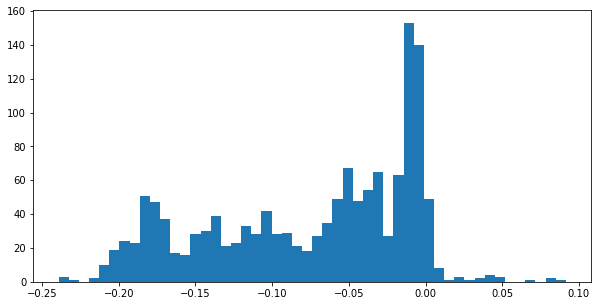

In [90]:
%matplotlib inline
plt.figure(figsize=(10, 5))
_ = plt.hist(decision_scores_train_abnormal, bins=50)

In [91]:
threshold = 0.0

Counter(y_test)

Counter({0: 11775, 1: 597})

In [97]:
print(X_test,X_test.shape)

[[ 0  0  7 ...  0  0  0]
 [ 0  0  7 ...  0  0  0]
 [ 0  0  7 ...  1  0  0]
 ...
 [ 0  0  7 ...  0  5  5]
 [ 0  0  7 ...  0  6  6]
 [ 0  0  3 ... 52 46 46]] (12372, 40)


In [98]:
IF.decision_function(X_test)

array([ 0.18594108,  0.21408244,  0.09048191, ..., -0.01528817,
       -0.05242006, -0.18511553])

In [99]:
mask = IF.decision_function(X_test) < threshold
mask.shape

(12372,)

In [104]:
y_pred = mask.astype('int')
y_pred

array([0, 0, 0, ..., 1, 1, 1])

In [106]:
from sklearn.metrics import accuracy_score, roc_auc_score
acc = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)
print("Accuracy ",acc)
print("AUC-ROC ",roc)

Accuracy  0.9966052376333656
AUC-ROC  0.9854956310213486
